## Code utilised for the visualisation of the JPMorgan dataset

### This code prepares the data for visualisation

In [2]:
import pandas as pd

# Load the order book data from the CSV file without a header
file_path = 'ALCD_orderbook_20_800002.csv'
orderbook_df = pd.read_csv(file_path, header=None)

# Replace 9999999999 and -9999999999 values with 0
orderbook_df.replace([9999999999, -9999999999], 0, inplace=True)

# Save the cleaned data back to the CSV file
cleaned_file_path = 'ALCD_orderbook_20_800002_cleaned.csv'
orderbook_df.to_csv(cleaned_file_path, header=False, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to ALCD_orderbook_20_800002_cleaned.csv


This next block can be run separately as a Python file in console to generate an interactive window to explore the order book at different times.

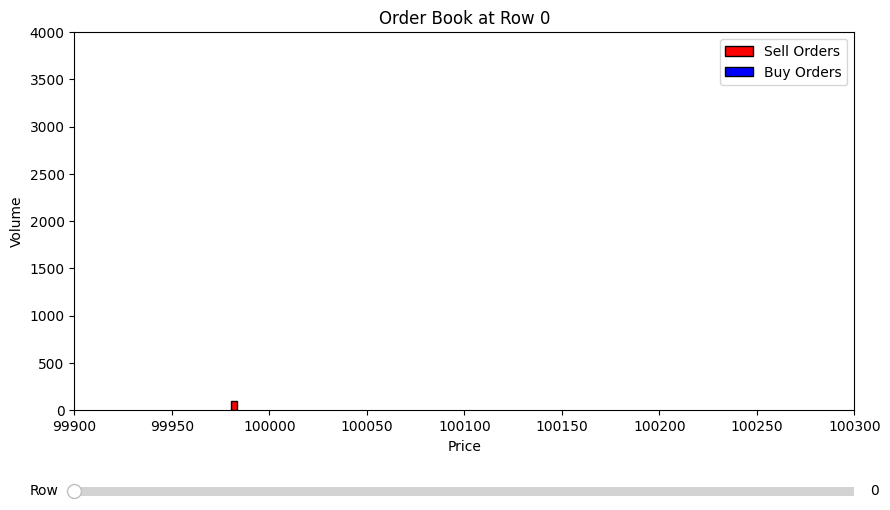

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Load the cleaned order book data from the CSV file
file_path = 'ALCD_orderbook_20_800002_cleaned.csv'
orderbook_df = pd.read_csv(file_path, header=None)

# Initial plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(left=0.25, bottom=0.25)

# Prepare the data for plotting
def prepare_data(row):
    ask_prices = []
    ask_volumes = []
    bid_prices = []
    bid_volumes = []
    
    for i in range(0, len(row), 4):
        ask_price = row[i]
        ask_volume = row[i+1]
        bid_price = row[i+2]
        bid_volume = row[i+3]
        
        ask_prices.append(ask_price)
        ask_volumes.append(ask_volume)
        bid_prices.append(bid_price)
        bid_volumes.append(bid_volume)
    
    return ask_prices, ask_volumes, bid_prices, bid_volumes

# Plot the order book
def plot_order_book(row_number):
    row = orderbook_df.iloc[row_number]
    ask_prices, ask_volumes, bid_prices, bid_volumes = prepare_data(row)
    
    ax.clear()
    
    # Plot ask orders (sell orders)
    ax.bar(ask_prices, ask_volumes, color='red', edgecolor='black', label='Sell Orders', width=3, align='center')
    
    # Plot bid orders (buy orders)
    ax.bar(bid_prices, bid_volumes, color='blue', edgecolor='black', label='Buy Orders', width=3, align='center')
    
    # Set labels and title
    ax.set_xlabel('Price')
    ax.set_ylabel('Volume')
    ax.set_title(f'Order Book at Row {row_number}')
    ax.set_xlim(99900, 100300)  # Set horizontal axis limits
    ax.set_ylim(0, 4000)
    ax.legend()
    plt.draw()

# Initial plot
row_to_show = 0
plot_order_book(row_to_show)

# Create the slider
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
row_slider = Slider(ax_slider, 'Row', 0, len(orderbook_df)-1, valinit=row_to_show, valstep=1)

# Update function
def update(val):
    plot_order_book(int(row_slider.val))

row_slider.on_changed(update)

plt.show()


This next block demonstrates the state of the orderbook at row 10951

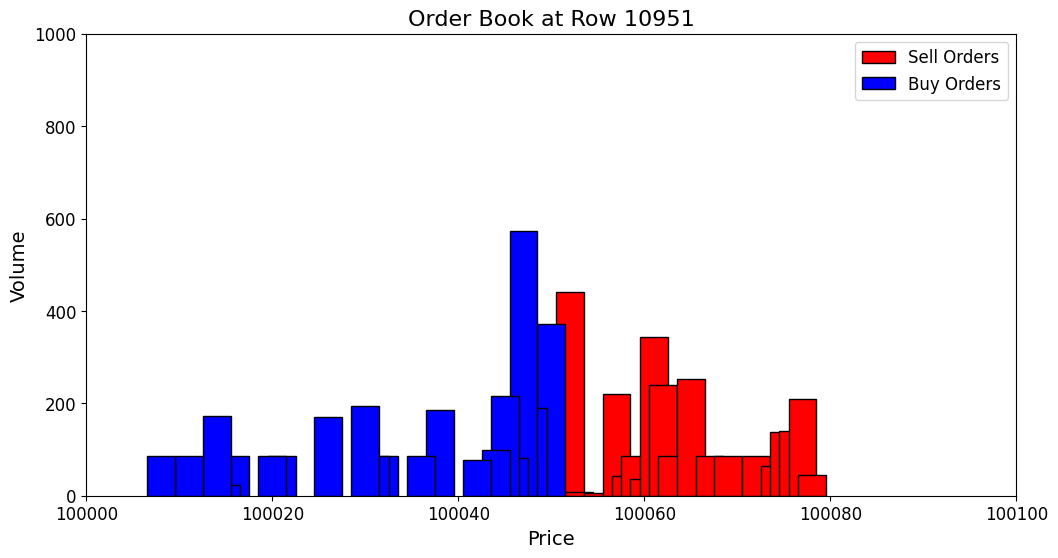

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Load the cleaned order book data from the CSV file
file_path = 'ALCD_orderbook_20_800002_cleaned.csv'
orderbook_df = pd.read_csv(file_path, header=None)

# Prepare the data for plotting
def prepare_data(row):
    ask_prices = []
    ask_volumes = []
    bid_prices = []
    bid_volumes = []
    
    for i in range(0, len(row), 4):
        ask_price = row[i]
        ask_volume = row[i+1]
        bid_price = row[i+2]
        bid_volume = row[i+3]
        
        ask_prices.append(ask_price)
        ask_volumes.append(ask_volume)
        bid_prices.append(bid_price)
        bid_volumes.append(bid_volume)
    
    return ask_prices, ask_volumes, bid_prices, bid_volumes

# Plot the order book at a specific row
def plot_order_book(row_number, ax):
    row = orderbook_df.iloc[row_number]
    ask_prices, ask_volumes, bid_prices, bid_volumes = prepare_data(row)
    
    ax.clear()
    
    # Plot ask orders (sell orders)
    ax.bar(ask_prices, ask_volumes, color='red', edgecolor='black', label='Sell Orders', width=3, align='center')
    
    # Plot bid orders (buy orders)
    ax.bar(bid_prices, bid_volumes, color='blue', edgecolor='black', label='Buy Orders', width=3, align='center')
    
    # Set labels and title
    ax.set_xlabel('Price', fontsize=14)
    ax.set_ylabel('Volume', fontsize=14)
    ax.set_title(f'Order Book at Row {row_number}', fontsize=16)
    ax.set_xlim(100000, 100100)  # Set horizontal axis limits
    ax.set_ylim(0, 1000)  # Set vertical axis limits
    ax.tick_params(axis='x', labelsize=12)  # Increase font size of x-axis numbers
    ax.tick_params(axis='y', labelsize=12)  # Increase font size of y-axis numbers
    ax.legend(fontsize=12)

# Create the plot for the order book at row 10951
fig, ax = plt.subplots(figsize=(12, 6))
plot_order_book(10951, ax)

plt.show()
